In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import scipy.constants as pcst
plt.rcParams['figure.figsize'] = (15.0, 15.0) 
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
data=np.loadtxt('irsa_catalog_search_results.tbl',skiprows=18)

In [74]:

l=data[:,0]
b=data[:,1]
k=data[:,2]
w=np.where(k<13.5)
print(np.size(w))
l=l[w]
b=b[w]
k=k[w]

546883


In [75]:
ra_random = l * u.degree
dec_random = b * u.degree

In [76]:
c = SkyCoord(ra=ra_random, dec=dec_random, frame='icrs')

In [77]:
c_gal=c.galactic

In [78]:
ra_rad = c_gal.l.wrap_at(180 * u.deg).radian
dec_rad = c_gal.b.radian

In [79]:
wb=np.where(k<10.)
wg=np.where((k>=10.)*(k<=12.5))
wr=np.where(k>12.5)

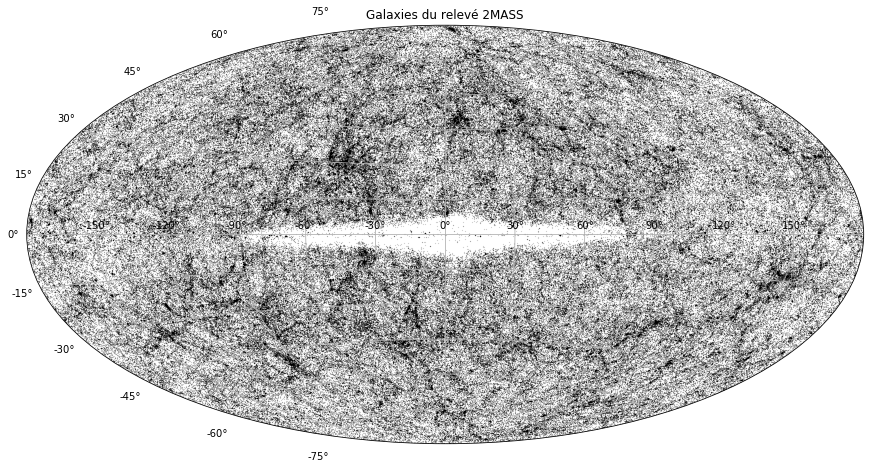

In [85]:
plt.figure()
plt.subplot(111, projection="aitoff")
plt.title("Galaxies du relevé 2MASS")
plt.grid(True)
#plt.scatter(ra_rad[wb], dec_rad[wb],s=2.,alpha=0.3,c='b')
#plt.scatter(ra_rad[wg], dec_rad[wg],s=0.5,alpha=0.3,c='g')
#plt.scatter(ra_rad[wr], dec_rad[wr],s=0.02,alpha=0.3,c='r')

plt.scatter(ra_rad, dec_rad,s=0.03,alpha=0.4,c='k')

plt.subplots_adjust(top=0.95,bottom=0.0)
plt.savefig('2MASSLSS.png')


In [98]:
w=np.where(k<13.5)
np.shape(w)

(1, 546883)

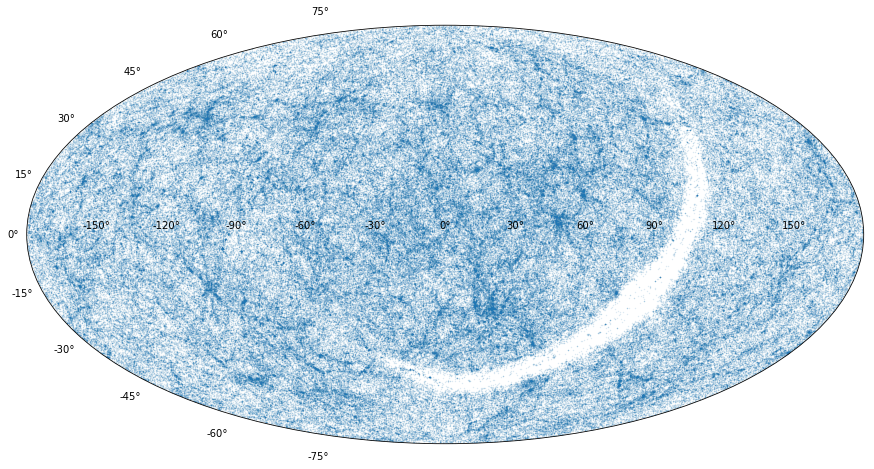

In [99]:
plt.figure()
plt.subplot(111,projection='aitoff')
plt.scatter(l[w],b[w],s=0.1,alpha=0.2)


In [102]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np

In [103]:
ra_random =l* u.degree
dec_random = (b) * u.degree


(-0.2, 0.2)

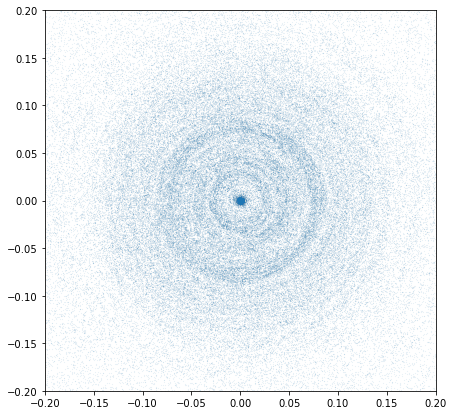

In [24]:
x=data[:,-1]*np.cos(data[:,1])
y=data[:,-1]*np.sin(data[:,1])

plt.scatter(x,y,s=0.001)
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])

In [2]:
r=np.array([57.9,108.2,149.6,227.9,778.6,1433.5,2872.5,4495.1,5906.4])
v=np.array([47.4,35.0,29.8,24.1,13.1,9.7,6.8,5.4,4.7])
rt=np.logspace(0,4,num=100)
vt=np.sqrt(pcst.G*1.98e30/(rt*1e9))

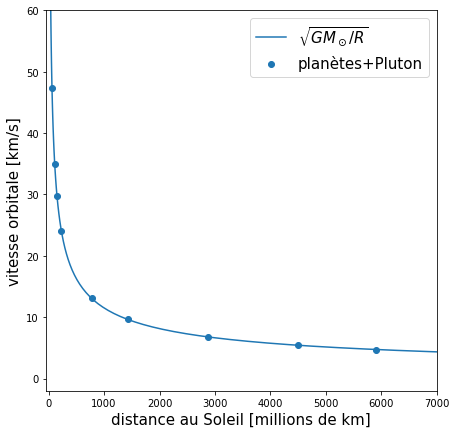

In [22]:
plt.figure()
plt.scatter(r,v)
plt.plot(rt,vt/1e3)
plt.ylim(-2,60)
plt.xlim(-50,7000)
plt.xlabel('distance au Soleil [millions de km]',fontsize=15)
plt.ylabel('vitesse orbitale [km/s]',fontsize=15)
plt.legend([r'$\sqrt{GM_\odot/R}$','planètes+Pluton'],loc=1,fontsize=15)
#plt.yscale('log')
#plt.xscale('log')
plt.savefig('sysol.png')

In [14]:
hmf0=np.loadtxt('mVector_PLANCK-SMT z: 0.0.txt',skiprows=12)
m0=hmf0[:,0]
dndm0=hmf0[:,5]
L0=hmf0[:,11]


hmf2=np.loadtxt('mVector_PLANCK-SMT z: 2.0.txt',skiprows=12)
m2=hmf2[:,0]
dndm2=hmf2[:,5]
L2=hmf2[:,11]

hmf5=np.loadtxt('mVector_PLANCK-SMT z: 5.0.txt',skiprows=12)
m5=hmf5[:,0]
dndm5=hmf5[:,5]
L5=hmf5[:,11]

hmf10=np.loadtxt('mVector_PLANCK-SMT z: 10.0.txt',skiprows=12)
m10=hmf10[:,0]
dndm10=hmf10[:,5]
L10=hmf10[:,11]

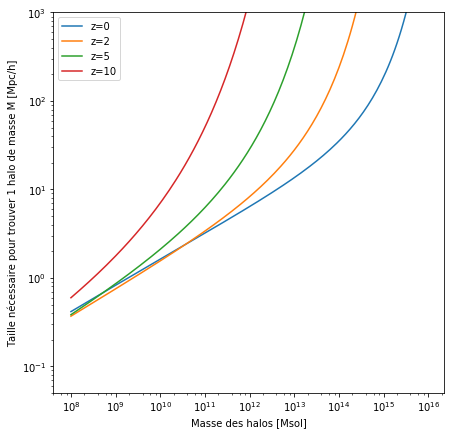

In [18]:
plt.figure()
plt.plot(m0,L0)
plt.plot(m2,L2)
plt.plot(m5,L5)
plt.plot(m10,L10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masse des halos [Msol]')
plt.ylabel('Taille nécessaire pour trouver 1 halo de masse M [Mpc/h]')
plt.legend(['z=0','z=2','z=5','z=10'])
plt.ylim([5e-2,1e3])
plt.savefig('L.png')

<IPython.core.display.Javascript object>


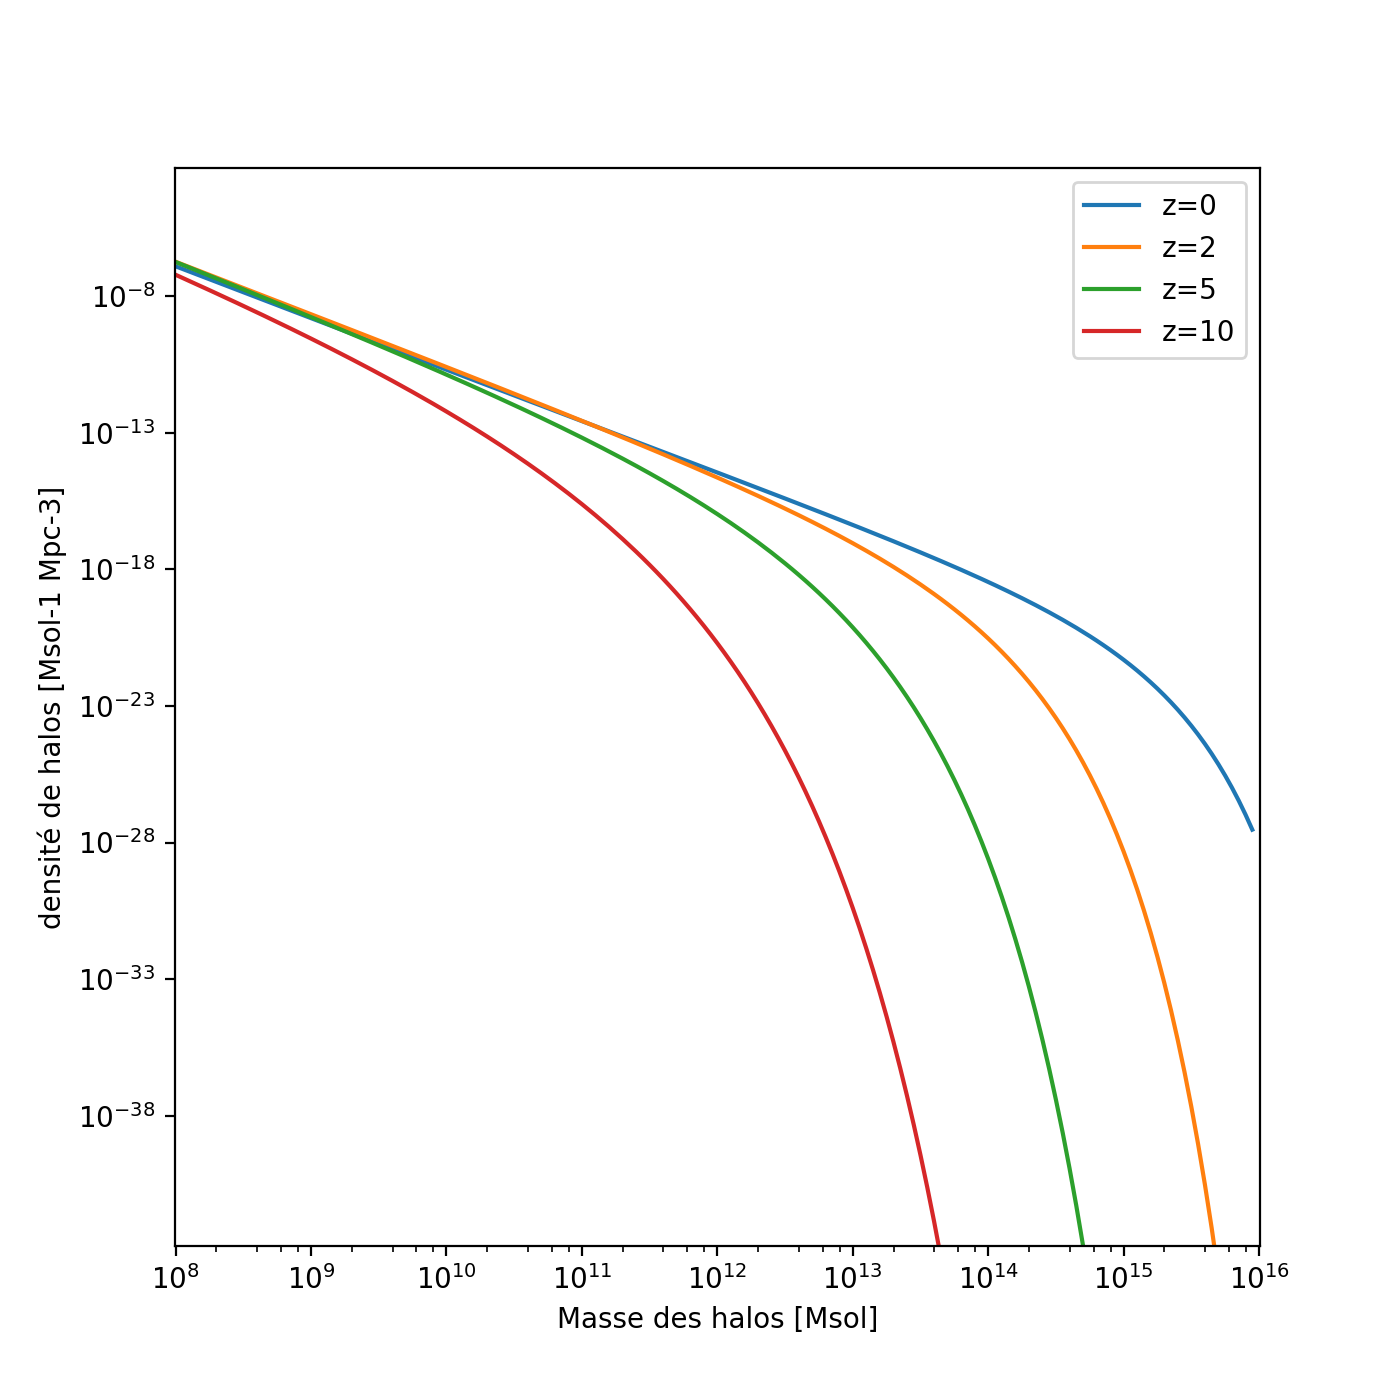

In [13]:
plt.figure()
plt.plot(m0,dndm0)
plt.plot(m2,dndm2)
plt.plot(m5,dndm5)
plt.plot(m10,dndm10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masse des halos [Msol]')
plt.ylabel('densité de halos [Msol-1 Mpc-3]')
plt.legend(['z=0','z=2','z=5','z=10'])

In [39]:
sndata=np.loadtxt('SN.txt',usecols=(2,3,4,5))
VSN=sndata[:,0]
DSN=sndata[:,1]

fpdata=np.loadtxt('FP.txt',usecols=(2,3,4))
VFP=fpdata[:,0]
DFP=fpdata[:,2]

tdata=np.loadtxt('TF.txt',usecols=(1,2,3,4))
VTF=tdata[:,0]
DTF=tdata[:,3]

sdata=np.loadtxt('SB.txt',usecols=(1,2,3))
VSB=sdata[:,0]
DSB=sdata[:,2]


In [40]:
VSB

array([ 7441.,  3118.,  4831.,  3468.,  3341.,  5061.])

In [41]:
DSB

array([ 102.3,   36.3,   68.2,   51.5,   55.5,   67.3])

<IPython.core.display.Javascript object>


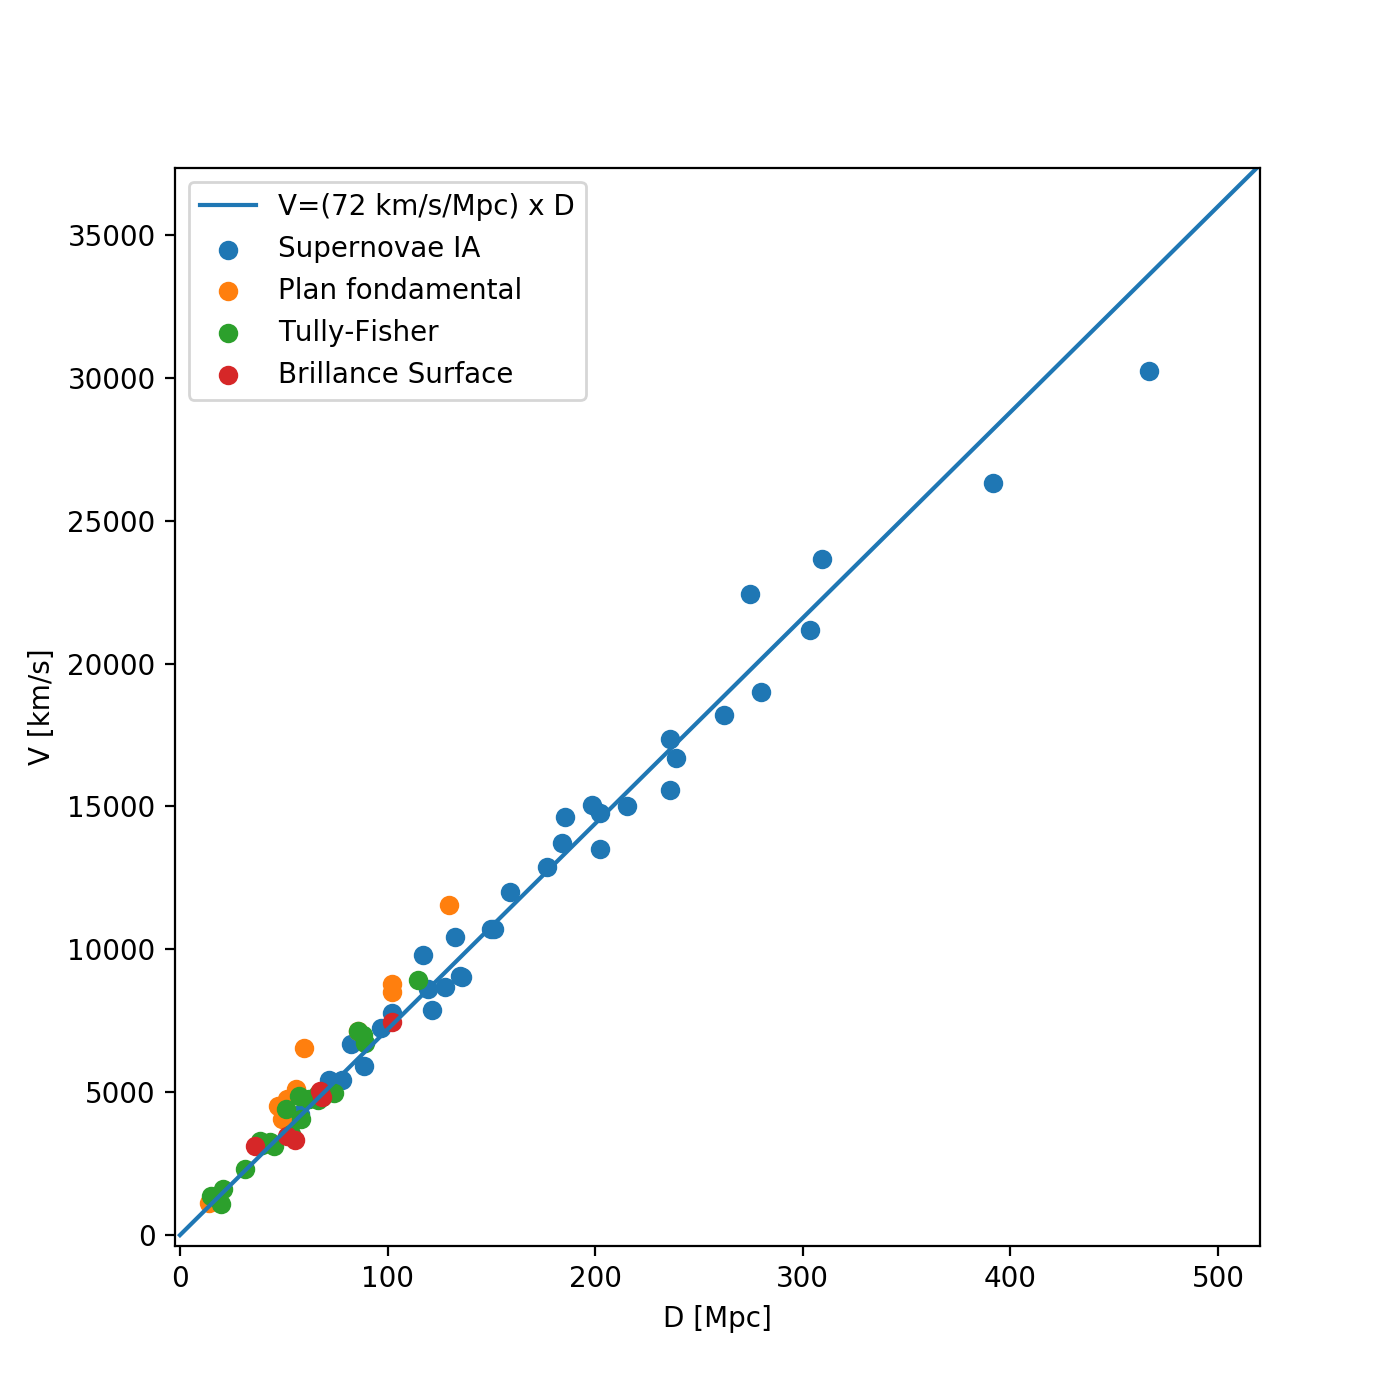

In [47]:
plt.figure()
plt.scatter(DSN,VSN)
plt.scatter(DFP,VFP)
plt.scatter(DTF,VTF)
plt.scatter(DSB,VSB)
dd=np.arange(0,1000)
plt.plot(dd,72*dd)
plt.xlabel('D [Mpc]')
plt.ylabel('V [km/s]')
plt.legend(['V=(72 km/s/Mpc) x D','Supernovae IA','Plan fondamental','Tully-Fisher','Brillance Surface'])